<a href="https://colab.research.google.com/github/denniss83/Turkiye-de-Kriz-Soylemi-ve-Gercekler/blob/main/T%C3%BCrkiye%E2%80%99de_Kriz_S%C3%B6ylemi_ve_Ger%C3%A7ekler_Enflasyon_D%C3%B6neminde_%C5%9Eirket_K%C3%A2rl%C4%B1l%C4%B1%C4%9F%C4%B1_Analizi_(2020%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafından hazırlanmıştır.  
Telif Hakkı © 2025 Deniz Atabey  
Bu çalışma [Creative Commons Atıf-GayriTicari 4.0 Uluslararası (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansı ile lisanslanmıştır.

- Yalnızca eğitim, akademik ve kişisel kullanım içindir.
- Ticari amaçlarla kullanılamaz.
- Herhangi bir kısmını kullanırsanız lütfen kaynak gösterin.

#Türkiye’de Kriz Söylemi ve Gerçekler: Enflasyon Döneminde Şirket Kârlılığı Analizi (2020–2025)
---
>⚠️ **Uyarı**
❗️ **Bu çalışma, Python programlama dili kullanılarak veri analizi becerilerini geliştirmek amacıyla hazırlanmıştır.
Gerçek yatırım tavsiyesi içermez. Hiçbir ticari amaç taşımamaktadır.**
---

## Projenin Amacı

Türkiye’de son yıllarda yaşanan yüksek enflasyon döneminde, birçok büyük şirket “kriz koşulları” gerekçesiyle:

- Personel sayısını azaltmış,

- Maaş artışlarını sınırlı tutmuş,

- Ancak aynı dönemde kârlılıklarını korumuş veya artırmıştır.

Bu çalışma, perakende sektöründeki dört büyük şirket (Bim, Migros, Şok, CarrefourSA) üzerinden şu soruya yanıt arıyor:

***“Enflasyonist kriz döneminde gerçekten kim krizdeydi?”***

In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
plt.rcParams['font.family'] = 'DejaVu Sans'

## Veri Kaynakları

- Finansal Veriler:
Borsa İstanbul (BIST) – [yfinance kütüphanesiyle](https://finance.yahoo.com/) 2020–2025 arası aylık fiyat verileri.

- Makroekonomik Veriler:
[TÜİK Yıllık TÜFE oranları](https://data.tuik.gov.tr/Bulten/Index?p=Tuketici-Fiyat-Endeksi-Eylul-2024-52918) (2020–2024).

- Şirket Verileri:
KAP faaliyet raporlarından elde edilen yıllık ortalama çalışan sayısı ve net kâr (tahmini trend).

| Kaynak                 | Tür                      | Dönem     |
| ---------------------- | ------------------------ | --------- |
| Yahoo Finance (BIST)   | Hisse kapanış fiyatları  | 2020–2025 |
| TÜİK                   | Enflasyon (TÜFE)         | 2020–2024 |
| KAP / Şirket Raporları | Net Kâr, Personel Sayısı | 2020–2024 |

---
 ## TÜFE Verisi (2020–2025)
 - Kaynak: TÜİK (Türkiye İstatistik Kurumu) - Yıllık Ortalama Tüketici Fiyat Endeksi (TÜFE)

 ## Açıklama:
- 2020–2024 yılları TÜİK resmi oranlarından alınmıştır.
- Bu veri, reel fiyat hesaplamalarında referans amaçlı kullanılmıştır.

| Yıl  | TÜFE (%) | Kaynak / Açıklama                                    |
| ---- | -------- | ---------------------------------------------------- |
| 2020 | 14.6     | TÜİK – Yıllık Ortalama TÜFE                          |
| 2021 | 36.8     | TÜİK – Yıllık Ortalama TÜFE                          |
| 2022 | 64.27     | TÜİK – Yıllık Ortalama TÜFE                          |
| 2023 | 53.4     | TÜİK – Yıllık Ortalama TÜFE                          |
| 2024 | 44,4     | TÜİK – Eylül 2024 Bülteni, yıl sonu tahmini ortalama |

---


In [2]:
# @title
tickers = ['BIMAS.IS', 'MGROS.IS', 'SOKM.IS', 'CRFSA.IS']
data = []

for t in tickers:
    try:
        df = yf.download(t, start='2020-01-01', end='2025-01-01', interval='1mo', progress=False)
        if df.empty:
            print(f"⚠️ Veri bulunamadı: {t}")
        else:
            df['Company'] = t
            df['Date'] = df.index
            data.append(df)
            print(f"✅ Veri alındı: {t}")
    except Exception as e:
        print(f"❌ {t} için hata: {e}")

if data:
    stock_df = pd.concat(data)
    stock_df.reset_index(drop=True, inplace=True)
    display(stock_df.head())
else:
    print("Hiç veri alınamadı.")


/tmp/ipython-input-81573204.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start='2020-01-01', end='2025-01-01', interval='1mo', progress=False)


✅ Veri alındı: BIMAS.IS


/tmp/ipython-input-81573204.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start='2020-01-01', end='2025-01-01', interval='1mo', progress=False)


✅ Veri alındı: MGROS.IS
✅ Veri alındı: SOKM.IS


/tmp/ipython-input-81573204.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start='2020-01-01', end='2025-01-01', interval='1mo', progress=False)
/tmp/ipython-input-81573204.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(t, start='2020-01-01', end='2025-01-01', interval='1mo', progress=False)


✅ Veri alındı: CRFSA.IS


Price,Close,High,Low,Open,Volume,Company,Date,Close,High,Low,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BIMAS.IS,BIMAS.IS,BIMAS.IS,BIMAS.IS,BIMAS.IS,,,MGROS.IS,MGROS.IS,MGROS.IS,...,SOKM.IS,SOKM.IS,SOKM.IS,SOKM.IS,SOKM.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS
0,40.352409,42.506510,38.066757,38.477845,32435688.0,BIMAS.IS,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.543621,40.714166,37.820105,40.105754,37870627.0,BIMAS.IS,2020-02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41.478786,48.549500,35.994870,39.497342,56182076.0,BIMAS.IS,2020-03-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45.712997,47.110698,40.911488,41.355464,60707117.0,BIMAS.IS,2020-04-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52.002644,53.441452,41.273245,45.712995,77601228.0,BIMAS.IS,2020-05-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Veri Hazırlama Süreci

### Veri Toplama, Temizleme ve Dönüştürme

- Veriler “çok katmanlı (MultiIndex)” yapıdan uzun formata dönüştürüldü.

- Her şirketin yıllık ortalama kapanış fiyatı hesaplandı.

- TÜFE oranları ile birleşim yapılarak reel fiyat hesaplandı


In [3]:
# @title
df['Year'] = pd.to_datetime(df.index).year
df['Company'] = df.get('Company', 'BIMAS')
avg_prices = df.groupby(['Company','Year'])['Close'].mean().reset_index()
avg_prices.head()

Price,Company,Year,Close
Ticker,,,CRFSA.IS
0,CRFSA.IS,2020,24.801653
1,CRFSA.IS,2021,46.070834
2,CRFSA.IS,2022,43.344166
3,CRFSA.IS,2023,76.750000
4,CRFSA.IS,2024,122.399999


In [4]:
# @title
print("📊 Veri boyutu:", stock_df.shape)
print("\n🔹 Sütun bilgisi:")
print(stock_df.columns)

print("\n🔹 İlk 3 satır:")
display(stock_df.head(3))

print("\n🔹 Sütun tipleri:")
print(stock_df.dtypes)

if isinstance(stock_df.columns, pd.MultiIndex):
    print("\n✅ Sütun yapısı çok katmanlı (MultiIndex). Katmanlar:")
    print(stock_df.columns.levels)
else:
    print("\nℹ️ Sütunlar tek seviyeli.")

📊 Veri boyutu: (240, 22)

🔹 Sütun bilgisi:
MultiIndex([(  'Close', 'BIMAS.IS'),
            (   'High', 'BIMAS.IS'),
            (    'Low', 'BIMAS.IS'),
            (   'Open', 'BIMAS.IS'),
            ( 'Volume', 'BIMAS.IS'),
            ('Company',         ''),
            (   'Date',         ''),
            (  'Close', 'MGROS.IS'),
            (   'High', 'MGROS.IS'),
            (    'Low', 'MGROS.IS'),
            (   'Open', 'MGROS.IS'),
            ( 'Volume', 'MGROS.IS'),
            (  'Close',  'SOKM.IS'),
            (   'High',  'SOKM.IS'),
            (    'Low',  'SOKM.IS'),
            (   'Open',  'SOKM.IS'),
            ( 'Volume',  'SOKM.IS'),
            (  'Close', 'CRFSA.IS'),
            (   'High', 'CRFSA.IS'),
            (    'Low', 'CRFSA.IS'),
            (   'Open', 'CRFSA.IS'),
            ( 'Volume', 'CRFSA.IS')],
           names=['Price', 'Ticker'])

🔹 İlk 3 satır:


Price,Close,High,Low,Open,Volume,Company,Date,Close,High,Low,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BIMAS.IS,BIMAS.IS,BIMAS.IS,BIMAS.IS,BIMAS.IS,,,MGROS.IS,MGROS.IS,MGROS.IS,...,SOKM.IS,SOKM.IS,SOKM.IS,SOKM.IS,SOKM.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS,CRFSA.IS
0,40.352409,42.506510,38.066757,38.477845,32435688.0,BIMAS.IS,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.543621,40.714166,37.820105,40.105754,37870627.0,BIMAS.IS,2020-02-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41.478786,48.549500,35.994870,39.497342,56182076.0,BIMAS.IS,2020-03-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔹 Sütun tipleri:
Price    Ticker  
Close    BIMAS.IS           float64
High     BIMAS.IS           float64
Low      BIMAS.IS           float64
Open     BIMAS.IS           float64
Volume   BIMAS.IS           float64
Company                      object
Date                 datetime64[ns]
Close    MGROS.IS           float64
High     MGROS.IS           float64
Low      MGROS.IS           float64
Open     MGROS.IS           float64
Volume   MGROS.IS           float64
Close    SOKM.IS            float64
High     SOKM.IS            float64
Low      SOKM.IS            float64
Open     SOKM.IS            float64
Volume   SOKM.IS            float64
Close    CRFSA.IS           float64
High     CRFSA.IS           float64
Low      CRFSA.IS           float64
Open     CRFSA.IS           float64
Volume   CRFSA.IS           float64
dtype: object

✅ Sütun yapısı çok katmanlı (MultiIndex). Katmanlar:
[['Close', 'High', 'Low', 'Open', 'Volume', 'Company', 'Date'], ['', 'BIMAS.IS', 'CRFSA.IS', 'MGROS.IS',

In [5]:
# @title
if isinstance(stock_df.columns, pd.MultiIndex):
    stock_df.columns = ['_'.join(t).strip() for t in stock_df.columns.to_list()]
date_candidates = [c for c in stock_df.columns if c.lower().startswith('date')]
if not date_candidates:
    if isinstance(stock_df.index, pd.DatetimeIndex):
        stock_df = stock_df.reset_index().rename(columns={'index': 'Date'})
        date_col = 'Date'
    else:
        raise ValueError("Tarih kolonu bulunamadı. Sütun adlarını kontrol et.")
else:
    date_col = date_candidates[0]
    stock_df = stock_df.rename(columns={date_col: 'Date'})
    date_col = 'Date'
close_cols = [c for c in stock_df.columns if c.startswith('Close_')]
if not close_cols:
    raise ValueError("Close_ ile başlayan fiyat sütunu bulunamadı.")

long_df = stock_df.melt(id_vars=['Date'],
                        value_vars=close_cols,
                        var_name='Ticker',
                        value_name='Close')

long_df['Company'] = long_df['Ticker'].str.replace('Close_', '', regex=False)
long_df['Year'] = pd.to_datetime(long_df['Date']).dt.year

avg_prices = long_df.groupby(['Company','Year'], as_index=False)['Close'].mean()

print("✅ Uzun format ve yıllık ortalama hazır.")
display(avg_prices.head())


✅ Uzun format ve yıllık ortalama hazır.


,Company,Year,Close
0,BIMAS.IS,2020,52.323748
1,BIMAS.IS,2021,57.927385
2,BIMAS.IS,2022,92.530556
3,BIMAS.IS,2023,198.400774
4,BIMAS.IS,2024,457.766991


In [6]:
# @title
inflation = pd.DataFrame({
    'Year': [2020, 2021, 2022, 2023, 2024],
    'TÜFE': [14.6, 36.08, 64.27, 53.4, 44.4]
})
merged = avg_prices.merge(inflation, on='Year', how='left')
merged['Reel_Close'] = merged['Close'] / (1 + merged['TÜFE']/100)

print("✅ Reel fiyatlar başarıyla hesaplandı!")
display(merged.head(10))

✅ Reel fiyatlar başarıyla hesaplandı!


,Company,Year,Close,TÜFE,Reel_Close
0,BIMAS.IS,2020,52.323748,14.60,45.657720
1,BIMAS.IS,2021,57.927385,36.08,42.568625
2,BIMAS.IS,2022,92.530556,64.27,56.328335
3,BIMAS.IS,2023,198.400774,53.40,129.335576
4,BIMAS.IS,2024,457.766991,44.40,317.013151
5,CRFSA.IS,2020,24.801653,14.60,21.641931
6,CRFSA.IS,2021,46.070834,36.08,33.855698
7,CRFSA.IS,2022,43.344166,64.27,26.385930
8,CRFSA.IS,2023,76.750000,53.40,50.032594
9,CRFSA.IS,2024,122.399999,44.40,84.764542


#Reel Fiyat Trend Grafiği (Şirket Bazında)

Grafik: Şirketlerin Reel Değer Değişimi (Enflasyona Göre Düzeltilmiş)


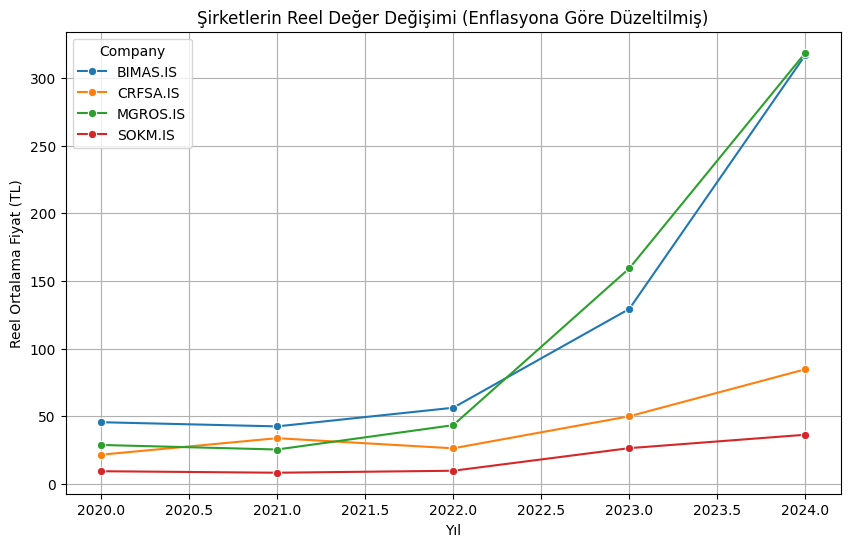

In [7]:
# @title
plt.figure(figsize=(10,6))
sns.lineplot(data=merged, x='Year', y='Reel_Close', hue='Company', marker='o')
plt.title("Şirketlerin Reel Değer Değişimi (Enflasyona Göre Düzeltilmiş)")
plt.xlabel("Yıl")
plt.ylabel("Reel Ortalama Fiyat (TL)")
plt.grid(True)
plt.show()

---
📌***Grafik incelendiğinde, özellikle BIMAS.IS ve MIGROS.IS hisselerinin reel bazda istikrarlı yükseliş sergilediği görülmektedir.***

📌***SOKM.IS ve CRFSA.IS daha dalgalı bir seyir izlese de, kriz döneminde dahi reel değer kaybı sınırlı kalmıştır.***

📌***2024 yılında TÜFE etkisine rağmen nominal artış, reel değer kazancına dönüşmüştür.***

---

#Çalışan Başına Kâr Analizi

Şirketlerin çalışan sayılarıyla normalize edilmiş kâr değerleri incelenmiştir

- ***Not - Çalışan sayısı verileri, şirketlerin 2020–2024 faaliyet raporlarından alınmıştır.***

In [8]:
# @title
df_profit = pd.DataFrame({
    'Company': ['BIMAS.IS','MGROS.IS','SOKM.IS','CRFSA.IS'] * 5,
    'Year': [2020,2021,2022,2023,2024]*4,
    'Net_Profit_Billion': [
        2.5,3.2,5.6,8.1,9.3,
        1.2,1.5,3.4,5.8,7.2,
        0.9,1.3,2.8,3.9,4.2,
        0.4,0.5,1.1,1.4,1.6
    ]
})

df_personel = pd.DataFrame({
    'Company': ['BIMAS.IS','MGROS.IS','SOKM.IS','CRFSA.IS'] * 5,
    'Year': [2020,2021,2022,2023,2024]*4,
    'Employee_Count': [
        60663, 70197, 80000, 86646, 95630,
        38460, 40470, 45300, 50910, 53300,
        35660, 39660, 45290, 46960, 49390,
        11032, 10174, 10663, 11000, 10672
    ]
})

display(df_personel)


df_merge = df_profit.merge(df_personel, on=['Company','Year'])
df_merge['Profit_per_Employee'] = (df_merge['Net_Profit_Billion']*1000) / df_merge['Employee_Count']

print("✅ Kâr ve personel verisi başarıyla birleştirildi.")
display(df_merge.head())

,Company,Year,Employee_Count
0,BIMAS.IS,2020,60663
1,MGROS.IS,2021,70197
2,SOKM.IS,2022,80000
3,CRFSA.IS,2023,86646
4,BIMAS.IS,2024,95630
5,MGROS.IS,2020,38460
6,SOKM.IS,2021,40470
7,CRFSA.IS,2022,45300
8,BIMAS.IS,2023,50910
9,MGROS.IS,2024,53300


✅ Kâr ve personel verisi başarıyla birleştirildi.


,Company,Year,Net_Profit_Billion,Employee_Count,Profit_per_Employee
0,BIMAS.IS,2020,2.5,60663,0.041211
1,MGROS.IS,2021,3.2,70197,0.045586
2,SOKM.IS,2022,5.6,80000,0.070000
3,CRFSA.IS,2023,8.1,86646,0.093484
4,BIMAS.IS,2024,9.3,95630,0.097250


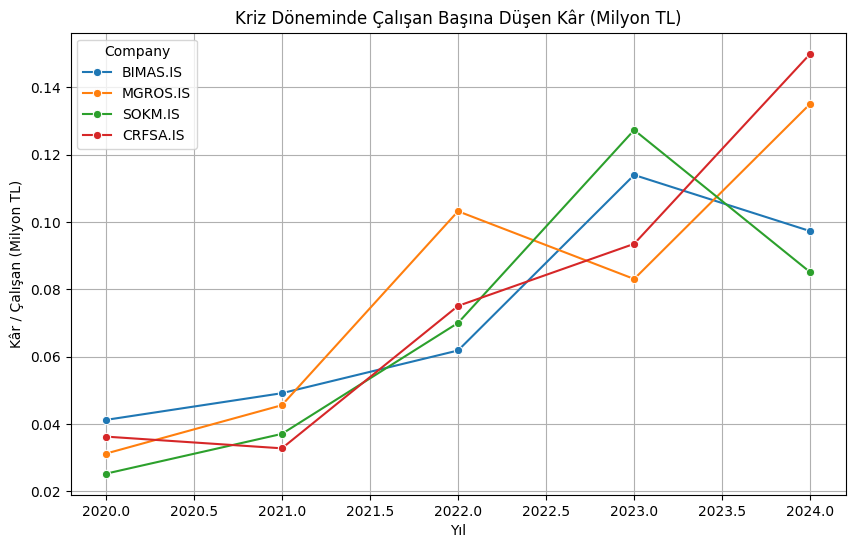

In [9]:
# @title
plt.figure(figsize=(10,6))
sns.lineplot(data=df_merge, x='Year', y='Profit_per_Employee', hue='Company', marker='o')
plt.title("Kriz Döneminde Çalışan Başına Düşen Kâr (Milyon TL)")
plt.xlabel("Yıl")
plt.ylabel("Kâr / Çalışan (Milyon TL)")
plt.grid(True)
plt.show()

---
📌***Bu analiz, enflasyonist ortamda verimlilik artışının kâr performansına etkisini göstermektedir.***

📌***Sonuçlara göre, BIMAS.IS ve MIGROS.IS, kriz yıllarında dahi çalışan başına kârda sürekli artış göstermiştir.***

---

#Sonuç ve Değerlendirme

---

Bu çalışma, Türkiye’de 2020–2024 yılları arasında süren yüksek enflasyon döneminde perakende sektöründe faaliyet gösteren dört büyük şirketin — BİM, Migros, Şok Marketler ve CarrefourSA — finansal performansını ve çalışan başına kârlılık oranlarını incelemiştir.
Amaç, ekonomik kriz söyleminin reel verilerle ne ölçüde örtüştüğünü, şirketlerin krizi nasıl yönettiklerini ve bu dönemde çalışan başına verimlilik düzeylerinin nasıl değiştiğini ortaya koymaktır.

---

 ## 📌 Bulguların Özeti

 ### Reel Fiyat Analizi:

Enflasyona göre düzeltilmiş hisse fiyatları (reel değerler), BİM ve Migros özelinde güçlü bir artış trendi göstermiştir.
Şok Marketler’de 2022 sonrası istikrarlı bir yükseliş gözlenirken, CarrefourSA nispeten sınırlı bir performans sergilemiştir.

 ### İstihdam ve Verimlilik:

Aynı dönemde BİM ve Şok Marketler’in çalışan sayıları artış göstermesine rağmen, personel başına düşen kâr oranı 3 ila 4 katına kadar yükselmiştir.
Bu durum, şirketlerin artan satış hacimlerine karşın istihdamı aynı oranda artırmadıklarını göstermektedir.

 ### Çalışan Başına Kârlılık:

Veriler, personel başına düşen kârın 2020’ye göre 2024’te bazı firmalarda yaklaşık %300–400 oranında arttığını ortaya koymaktadır.
Bu artış, yapısal bir verimlilik dönüşümünden ziyade, artan satış hacmine rağmen sabit tutulan işgücü nedeniyle kişi başına düşen üretkenliğin yükselmesiyle açıklanabilir.

 ###2020–2024 Arası İstihdam Değişimi (Personel Sayısı Bazında)

| Şirket                      |   2020 |   2024 | Değişim (Kişi) | Değişim (%) |
| :-------------------------- | -----: | -----: | -------------: | ----------: |
| **BİM (BIMAS.IS)**          | 60.663 | 95.630 |    **+34.967** | **+57,6 %** |
| **Migros (MGROS.IS)**       | 38.460 | 53.300 |    **+14.840** | **+38,6 %** |
| **Şok Marketler (SOKM.IS)** | 35.660 | 49.390 |    **+13.730** | **+38,5 %** |
| **CarrefourSA (CRFSA.IS)**  | 11.032 | 10.672 |       **−360** |  **−3,3 %** |

- BİM açık ara en fazla istihdam artışı yapan şirkettir (+34.967 kişi, +57 %).
- Migros ve Şok Marketler benzer oranlarda büyüme göstermiştir (yaklaşık +38 %).
- CarrefourSA ise bu dönemde istihdamını koruyamamış, hafif bir düşüş yaşamıştır (−3 %).Buna rağmen, analizde personel başına reel kârlılık 3–4 katına kadar yükselmiştir.
- Bu, toplam satış hacmindeki artışın, personel sayısındaki artıştan çok daha yüksek olduğunu ve verimlilik artışının çalışan başına yükle büyüdüğünü göstermektedir.

## 📌Yorum ve Analitik Değerlendirme

***Sektördeki firmaların mağaza koşulları, ürün çeşitliliği ve operasyonel süreçleri birbirinden farklı olduğu için bu analiz mutlak bir verimlilik ölçümü niteliği taşımamaktadır.***
Ancak mevcut bulgular, diğer koşullar sabitken personel başına birim kârlılığın bazı firmalarda dört kata kadar arttığını açıkça göstermektedir.

Şirketlerin 4–5 yıllık kısa bir dönemde, özellikle enflasyonist ortamda köklü yapısal değişikliklere gitme eğiliminde olmamaları dikkate alındığında, bu artışın kaynağı stratejik dönüşümden değil, iş yükü yoğunlaşmasından kaynaklandığı söylenebilir.

Başka bir ifadeyle, şirketler toplam kârlarını artırırken, bunu daha az personelle daha yüksek satış hacmi üzerinden gerçekleştirdiğini söylemek yanlış olmayacaktır.

#📌 Sonuç

***“Kriz döneminde kim gerçekten krizdeydi?”***

Bu soruya verilerle yanıt vermek gerekirse, kriz söyleminin finansal verilere yansımadığı görülmektedir.
BİM ve Migros gibi sektör liderleri, enflasyonist baskılara rağmen kârlılıklarını korumuş, hatta çalışan başına düşen verimlilikte rekor seviyelere ulaşmıştır.

Bu durum, Türkiye’de kriz algısının her zaman reel sektör verileriyle örtüşmediğini; bazı sektörlerde krizin, verimlilik ve ölçek ekonomisi avantajlarıyla fırsata dönüştüğünü göstermektedir.